In [2]:
#Import packages
import numpy as np
from PIL import Image
from PIL import ImageSequence
import requests

In [ ]:
#Download necessary image files
base_url = 'https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/'
file_urls = ['training.tif','training_groundtruth.tif','testing.tif','testing_groundtruth.tif']

file_folder = 'Raw_Data/'

for tif in file_urls:
    url = base_url + tif
    r = requests.get(url)

    with open(file_folder, 'wb') as f:
        f.write(r.content)

In [4]:
#Read in train image files
tif_file = "Raw_Data/training.tif"
name_string = 'training_inputs'

def Tif_Stack_To_Array(tif_file,name_string):
    stack = Image.open(tif_file)

    width, height = stack.size
    slices = 0
    for frame in ImageSequence.Iterator(stack):
        slices += 1
    
    print('File Format:', stack.format,'\nSize:',width,'x',height,'x',slices)

    #Create numpy array of length N training examples, C, channels, widtch W, and height H
    array_out = np.empty((slices,1,height,width))

    for i,frame in enumerate(ImageSequence.Iterator(stack)):
        array_out[i,:,:,:] = np.array(frame)
    
    np.save(name_string, array_out)
    
    return array_out
    
training_inputs = Tif_Stack_To_Array(tif_file, name_string)

File Format: TIFF 
Size: 1024 x 768 x 165


In [8]:
#Do the same for the other data files
training_ground_truth = Tif_Stack_To_Array("Raw_Data/training_groundtruth.tif",
                                           'training_ground_truth')

training_ground_truth = Tif_Stack_To_Array("Raw_Data/testing.tif",
                                           'testing_inputs')

tseting_ground_truth = Tif_Stack_To_Array("Raw_Data/testing_groundtruth.tif",
                                           'testing_ground_truth')

File Format: TIFF 
Size: 1024 x 768 x 165
File Format: TIFF 
Size: 1024 x 768 x 165
File Format: TIFF 
Size: 1024 x 768 x 165


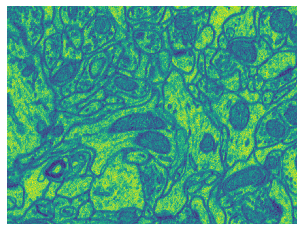

In [10]:
import matplotlib.pyplot as plt
image = training_inputs[5,0,:,:]
plt.imshow(image)
plt.gca().axis('off')
plt.show()